# Personal Finance Intelligence – Exploratory Data Analysis (EDA)

This notebook analyzes 3 months of personal expense data to identify spending patterns, category distribution, and monthly trends.


## Objective

The objective of this analysis is to understand spending behavior and identify patterns that can support financial decision-making.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("ggplot")


In [2]:
df = pd.read_csv("../data/expenses.csv")
df.head()


,date,category,amount,description
0,2026-01-01,Food,250,Lunch
1,2026-01-02,Transport,120,Bus fare
2,2026-01-03,Groceries,1800,Supermarket
3,2026-01-05,Entertainment,500,Movie
4,2026-01-07,Rent,8000,January Rent


In [3]:
df.shape


(36, 4)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         36 non-null     object
 1   category     36 non-null     object
 2   amount       36 non-null     int64 
 3   description  36 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.3+ KB


In [5]:
df.describe()


,amount
count,36.000000
mean,1465.194444
std,2107.174761
min,120.000000
25%,307.500000
50%,749.500000
75%,1650.000000
max,8000.000000


In [6]:
df.isnull().sum()


date           0
category       0
amount         0
description    0
dtype: int64

In [7]:
df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df.head()


,date,category,amount,description,month,day
0,2026-01-01,Food,250,Lunch,1,1
1,2026-01-02,Transport,120,Bus fare,1,2
2,2026-01-03,Groceries,1800,Supermarket,1,3
3,2026-01-05,Entertainment,500,Movie,1,5
4,2026-01-07,Rent,8000,January Rent,1,7


In [8]:
monthly_spending = df.groupby("month")["amount"].sum()
monthly_spending


month
1    17349
2    17069
3    18329
Name: amount, dtype: int64

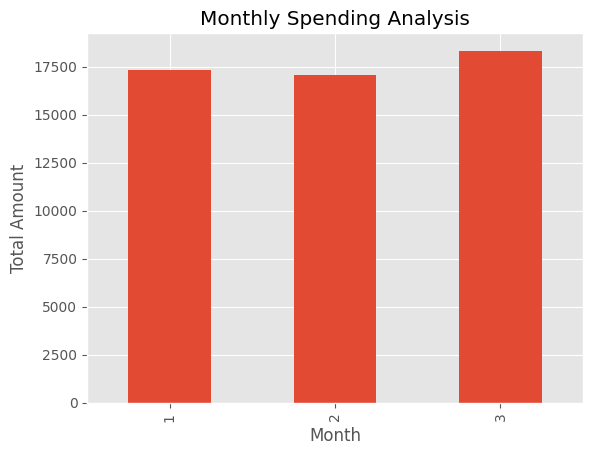

In [9]:
monthly_spending.plot(kind="bar", title="Monthly Spending Analysis")
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.show()


In [10]:
category_spending = df.groupby("category")["amount"].sum().sort_values(ascending=False)
category_spending


category
Rent             24000
Shopping          6500
Groceries         5900
Utilities         4500
Healthcare        3200
Food              2630
Internet          2397
Transport         1820
Entertainment     1800
Name: amount, dtype: int64

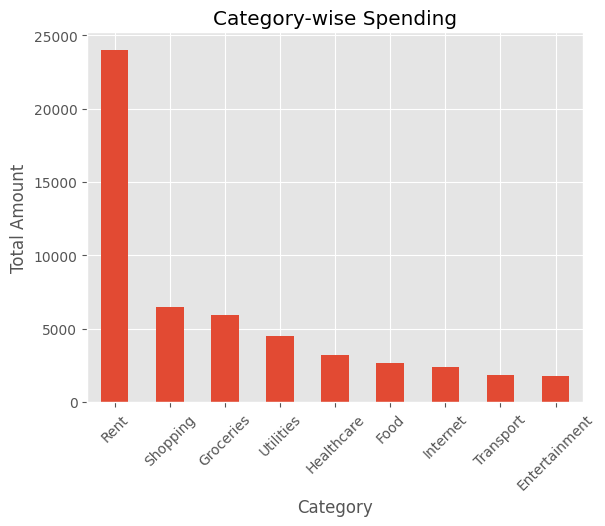

In [11]:
category_spending.plot(kind="bar", title="Category-wise Spending")
plt.xlabel("Category")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)
plt.show()


In [12]:
df.sort_values(by="amount", ascending=False).head()


,date,category,amount,description,month,day
15,2026-02-07,Rent,8000,February Rent,2,7
27,2026-03-07,Rent,8000,March Rent,3,7
4,2026-01-07,Rent,8000,January Rent,1,7
30,2026-03-15,Shopping,2500,Gadgets,3,15
7,2026-01-15,Shopping,2200,Clothes,1,15


## Key Insights

- Rent is the highest expense category.
- Monthly spending shows an increasing trend.
- Food and groceries contribute significantly to recurring expenses.
- A few high-value transactions dominate overall spending.
